In [1]:
import numpy
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
#from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

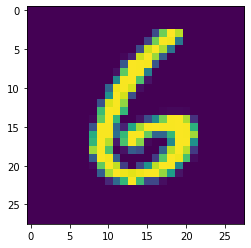

In [7]:
plt.imshow(x_train[6000])     #ploting the index=image

In [8]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

In [9]:
number_of_classes = 10  #storing the no of classes in a variable
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)
y_train[0] #Printing the new label

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
#create model
model=Sequential ()
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
#flatten the dimension of the image
model.add(Flatten())
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

In [11]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [13]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=960)

Epoch 1/5
63/63 [==============================] - 159s 3s/step - loss: 0.0178 - accuracy: 0.9948 - val_loss: 0.0772 - val_accuracy: 0.9794
Epoch 2/5
63/63 [==============================] - 161s 3s/step - loss: 0.0123 - accuracy: 0.9963 - val_loss: 0.0854 - val_accuracy: 0.9778
Epoch 3/5
63/63 [==============================] - 159s 3s/step - loss: 0.0089 - accuracy: 0.9975 - val_loss: 0.0896 - val_accuracy: 0.9778
Epoch 4/5
63/63 [==============================] - 156s 2s/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.0920 - val_accuracy: 0.9812
Epoch 5/5
63/63 [==============================] - 158s 3s/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.0961 - val_accuracy: 0.9796


In [14]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.09610849618911743, 0.9796000123023987]


In [15]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

[[1.93019466e-21 2.44215311e-15 7.72165981e-16 1.81576543e-05
  9.44509823e-03 7.28445784e-08 1.33626495e-17 2.30123624e-05
  6.57114128e-07 9.90512967e-01]]


In [16]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images
np.argmax(y_test[5000:5001]) #printing the actual labels

[9]


3

In [17]:
ls


In [18]:
# Save the model
model.save('project.h5')

#model_result_path = "keras_model.h5"
#model.save(model_result_path)


In [19]:
#!tar -zcvf keras_model.tgz keras_model.h5
!tar -zcvf project-model_new.tgz project.h5

project.h5


In [20]:


ls -1

project.h5
project-model_new.tgz


In [21]:
!pip install ibm_watson_machine_learning --upgrade

In [22]:
from ibm_watson_machine_learning import APIClient
wml_credentials={"url": "https://us-south.ml.cloud.ibm.com","apikey":"D_66-pf8c-JMXbPzjLcWcbVtUoAg1ta4Qe7H-5rH28Pa"}
client=APIClient(wml_credentials)

In [23]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources']if item['entity']["name"]==space_name)['metadata']['id'])

In [26]:
space_uid=guid_from_space_name(client, 'ModelDeployment')
print("Space UID = " + space_uid)

Space UID = 56e00729-8af8-4c26-a2bf-dd61e5bf5ba7


In [27]:
client.set.default_space(space_uid)

'SUCCESS'

In [28]:

client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [29]:
software_spec_uid=client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid


'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [30]:


model_details = client.repository.store_model(model= 'project-model_new.tgz',
    meta_props={
        client.repository.ModelMetaNames.NAME:"CNN",
        client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
        client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}
    )

                                                                    

In [31]:
model_id = client.repository.get_model_id(model_details)

In [32]:
model_id

'4dae2a3c-c5f1-4538-a73a-d62fdb22a1d4'

In [33]:
ls

project.h5  project-model_new.tgz
